In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

from tensorflow import keras as tfkeras
from keras import layers, losses
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

2024-04-14 12:02:56.700950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 12:02:56.701056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 12:02:56.833430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
text_data = '/kaggle/input/emotions/text.csv'

dataset = pd.read_csv(text_data)

In [3]:
dataset

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [4]:
dataset['label'].unique()

array([4, 0, 2, 1, 5, 3])

In [5]:
tweets = dataset['text'].tolist()
categories = dataset['label'].tolist()


In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

vocab_size = len(tokenizer.word_index) + 1
print(f'Vocab size is {vocab_size}')

Vocab size is 75303


In [7]:
# reddit_data = '/content/drive/MyDrive/Datasets/Twitter_reddit SA data/Reddit_Data.csv'

train_size = 300000
embedding_dim = 100
max_length = 128
trunc_type='post'
pad_type='post'

train_text = tweets[0:train_size]
test_text = tweets[train_size:]

train_labels = categories[0:train_size]
test_labels = categories[train_size:]

In [8]:
train_sequence = tokenizer.texts_to_sequences(train_text)
train_padded = pad_sequences(train_sequence, padding='post', maxlen=max_length, truncating=trunc_type)

test_sequence = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequence, padding='post', maxlen=max_length, truncating=trunc_type)

train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

test_labels = test_labels[:len(test_padded)]

dataset_shape = dataset.shape

train_labels = to_categorical(train_labels, num_classes=6)
test_labels = to_categorical(test_labels, num_classes=6)

In [9]:
early_stop = tfkeras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [10]:
text_model = tfkeras.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])


text_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
len(train_padded)

300000

In [12]:
history = text_model.fit(
    train_padded, train_labels,
    epochs=30,
    validation_data=(test_padded, test_labels),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/30
  54/9375 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.3093 - loss: 1.6379

I0000 00:00:1713096216.026365      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.4824 - loss: 1.3654 - val_accuracy: 0.8819 - val_loss: 0.4166
Epoch 2/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8968 - loss: 0.3188 - val_accuracy: 0.8859 - val_loss: 0.2944
Epoch 3/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9067 - loss: 0.2489 - val_accuracy: 0.9008 - val_loss: 0.2433
Epoch 4/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9106 - loss: 0.2333 - val_accuracy: 0.8984 - val_loss: 0.2541
Epoch 5/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9122 - loss: 0.2275 - val_accuracy: 0.8988 - val_loss: 0.2460
Epoch 6/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9158 - loss: 0.2186 - val_accuracy: 0.8935 - val_loss: 0.2831
Epoch 7/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9167 - loss: 0.2134 - val_accuracy: 0.8954 - val_loss: 0.2373
Epoch 8/30
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9179 - loss: 0.2100 - val

Minimum validation loss: 0.2373475283384323


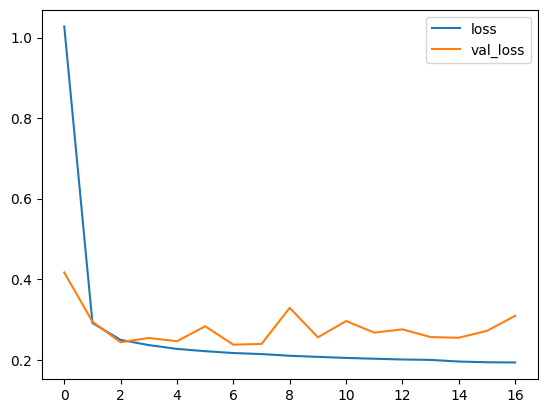

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [14]:
results = text_model.evaluate(test_padded, test_labels, batch_size=32)

print(f'Your model has an accuracy of {100*results[1]}%')

3651/3651 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8964 - loss: 0.2328
Your model has an accuracy of 89.5376205444336%


## Input Classifcation
The Model has been built. Now its time to setup the code for processing and classifiying input sentiment

In [15]:
test_sentences = [
    'I definitely love machine learning, its so cool',
    'Twitter is a really difficult place, so much hate',
    'I am okay, not so bad',
    'Oh I am overflowing with joy and happiness'
]

# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

def preprocess_text(text):
  text = text.lower()
  input_sequence = tokenizer.texts_to_sequences([text])
  input_padded = pad_sequences(input_sequence, maxlen=100, padding='post')

  return input_padded


In [16]:
input_text = test_sentences[1]

for input_text in test_sentences:
    input = preprocess_text(input_text)

    score = text_model.predict(input)

    emotions = ['sadness (0)', 'joy (1)', 'love (2)', 'anger (3)', 'fear (4)', 'surprise (5)']

    predicted_class = np.argmax(score)
    certainty = 100 * np.max(score)

    print(f'Input Sentence: {input_text}')
    print(f'Predicted: {emotions[predicted_class]}')
    print(f'Certainty: {certainty:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Input Sentence: I definitely love machine learning, its so cool
Predicted: joy (1)
Certainty: 99.37%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input Sentence: Twitter is a really difficult place, so much hate
Predicted: sadness (0)
Certainty: 40.39%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Input Sentence: I am okay, not so bad
Predicted: sadness (0)
Certainty: 97.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input Sentence: Oh I am overflowing with joy and happiness
Predicted: joy (1)
Certainty: 69.19%
